<a href="https://colab.research.google.com/github/anamkhan315/test2/blob/main/lat_lon_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install folium
!pip install rasterio
!pip install numpy
!pip install matplotlib
!pip install geopy


Load satellite image

In [ ]:
# Install libraries if not already installed
# !pip install rasterio folium matplotlib pandas

import rasterio
import folium
import matplotlib.pyplot as plt
import pandas as pd


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:355: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


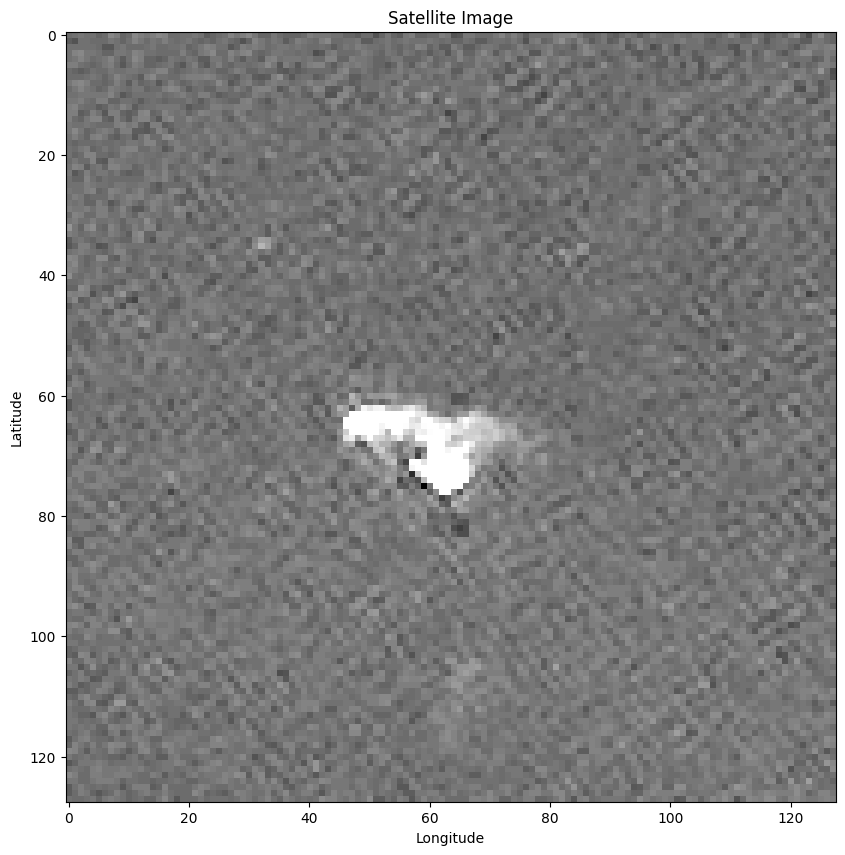

In [ ]:
# Load a satellite image using rasterio
image_path = '/content/drive/MyDrive/Ignacio_GW_WV3_PS_20170220_B0.PNG'  # Replace with your image path

# Open the raster image
with rasterio.open(image_path) as src:
    image = src.read(1)  # Reading the first band
    transform = src.transform

# Plot the satellite image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.title('Satellite Image')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
data = {
    'Latitude': [26.7771],  # Replace with your data
    'Longitude': [-113.253]  # Replace with your data
}

df = pd.DataFrame(data)


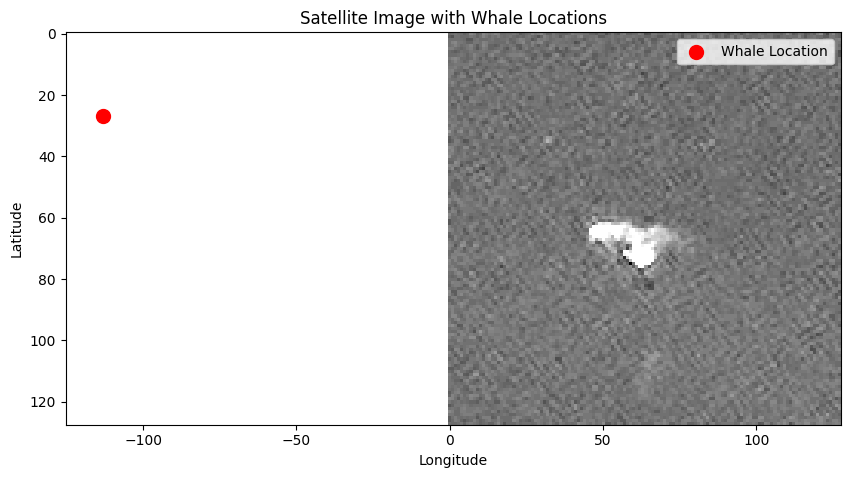

In [ ]:
# Plot the satellite image with whale coordinates
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.scatter(df['Longitude'], df['Latitude'], color='red', marker='o', s=100, label='Whale Location')
plt.title('Satellite Image with Whale Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [ ]:
# Create a folium map centered at an approximate location
m = folium.Map(location=[-33.75, 151.0], zoom_start=8)

# Add whale coordinates to the map
for lat, lon in zip(df['Latitude'], df['Longitude']):
    folium.Marker(location=[lat, lon], popup=f'Whale at ({lat}, {lon})').add_to(m)

# Display the map
m.save("whale_tracking_map.html")
m
